In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [15]:
train_data = pd.read_csv('/Users/hks/Desktop/FashionMNIST/fashion-mnist_train.csv')
test_data = pd.read_csv('/Users/hks/Desktop/FashionMNIST/fashion-mnist_test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values.astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int32')
X_test = test_data.iloc[:, 1:].values.astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int32')

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [17]:


class FashionMNISTDataset:
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image = self.data.iloc[idx, 1:].values.astype(np.uint8).reshape(28, 28, 1)
        label = self.data.iloc[idx, 0]
        return image, label

def transform_image(image):
    # Define the transformations
    image = tf.image.resize(image, [28, 28])
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert to [0,1] range
    return image

def generator(data):
    dataset = FashionMNISTDataset(data)
    for i in range(len(dataset)):
        image, label = dataset[i]
        image = transform_image(image)
        yield image, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_generator(
    generator,
    args=[train_data],
    output_signature=(
        tf.TensorSpec(shape=(28, 28, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
)

test_dataset = tf.data.Dataset.from_generator(
    generator,
    args=[test_data],
    output_signature=(
        tf.TensorSpec(shape=(28, 28, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
)

# Batch and shuffle the datasets
train_loader = train_dataset.batch(64).shuffle(buffer_size=len(train_data))
test_loader = test_dataset.batch(1000)


In [18]:


class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = layers.Conv2D(filters=16, kernel_size=5, padding='same', activation='relu')
        self.maxpool1 = layers.MaxPooling2D(pool_size=2)
        
        self.cnn2 = layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')
        self.maxpool2 = layers.MaxPooling2D(pool_size=2)
        
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10)

    def call(self, inputs, training=False):
        x = self.cnn1(inputs)
        x = self.maxpool1(x)
        
        x = self.cnn2(x)
        x = self.maxpool2(x)
        
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

model = CNN()


In [22]:
model = CNN()  # Instantiate the model

model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

In [26]:
import tensorflow as tf
import numpy as np

def generator(data):
    for i in range(len(data)):
        image = data[i, 1:].reshape(28, 28, 1).astype(np.float32)
        label = int(data[i, 0])
        yield image, label

# Create TensorFlow datasets with batching and shuffling
train_dataset = tf.data.Dataset.from_generator(
    generator,
    args=[train_data.values],  # Convert DataFrame to numpy array
    output_signature=(
        tf.TensorSpec(shape=(28, 28, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
).batch(64).shuffle(buffer_size=len(train_data))

test_dataset = tf.data.Dataset.from_generator(
    generator,
    args=[test_data.values],  # Convert DataFrame to numpy array
    output_signature=(
        tf.TensorSpec(shape=(28, 28, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
).batch(1000)

# Define the CNN model
class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding='same', activation='relu')
        self.maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=2)
        
        self.cnn2 = tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')
        self.maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=2)
        
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(128, activation='relu')
        self.fc2 = tf.keras.layers.Dense(10)

    def call(self, inputs, training=False):
        x = self.cnn1(inputs)
        x = self.maxpool1(x)
        
        x = self.cnn2(x)
        x = self.maxpool2(x)
        
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

# Initialize and compile the model
model = CNN()
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Define the training function
def train_model(model, train_dataset, test_dataset, n_epochs):
    cost_list = []
    accuracy_list = []
    
    for epoch in range(n_epochs):
        # Training
        history = model.fit(
            train_dataset,
            epochs=1,  # Train for 1 epoch per call
            verbose=0
        )
        
        # Append the loss from the history
        cost_list.append(history.history['loss'][0])
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {history.history["loss"][0]:.4f}')
        
        # Evaluate on the test dataset
        test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
        accuracy_list.append(test_accuracy)
        print(f'Accuracy of the model on the test images: {test_accuracy * 100:.2f}%')
    
    return cost_list, accuracy_list

# Train the model
n_epochs = 10
cost_list, accuracy_list = train_model(model, train_dataset, test_dataset, n_epochs)


2024-07-24 18:45:24.724140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


Epoch [1/10], Loss: 3.7545


2024-07-24 18:45:26.771019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 68.11%


2024-07-24 18:45:58.881348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [2/10], Loss: 0.7847


2024-07-24 18:46:00.773138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 70.28%


2024-07-24 18:46:33.228448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [3/10], Loss: 0.7131


2024-07-24 18:46:35.176464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 73.40%


2024-07-24 18:47:07.556578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [4/10], Loss: 0.6274


2024-07-24 18:47:09.505801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 79.14%


2024-07-24 18:47:41.640016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [5/10], Loss: 0.4957


2024-07-24 18:47:43.525723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 83.03%


2024-07-24 18:48:15.944053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [6/10], Loss: 0.4301


2024-07-24 18:48:18.000005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 85.08%


2024-07-24 18:48:50.415905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [7/10], Loss: 0.3920


2024-07-24 18:48:52.352297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 86.44%


2024-07-24 18:49:24.247120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [8/10], Loss: 0.3700


2024-07-24 18:49:26.152042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 86.02%


2024-07-24 18:49:58.287104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [9/10], Loss: 0.3532


2024-07-24 18:50:00.375215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Accuracy of the model on the test images: 86.96%


2024-07-24 18:50:32.530128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch [10/10], Loss: 0.3410
Accuracy of the model on the test images: 87.06%


2024-07-24 18:50:34.413828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


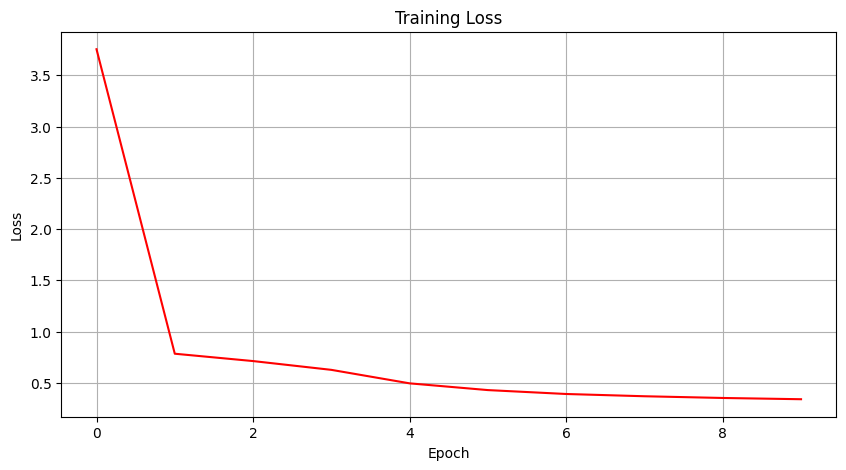

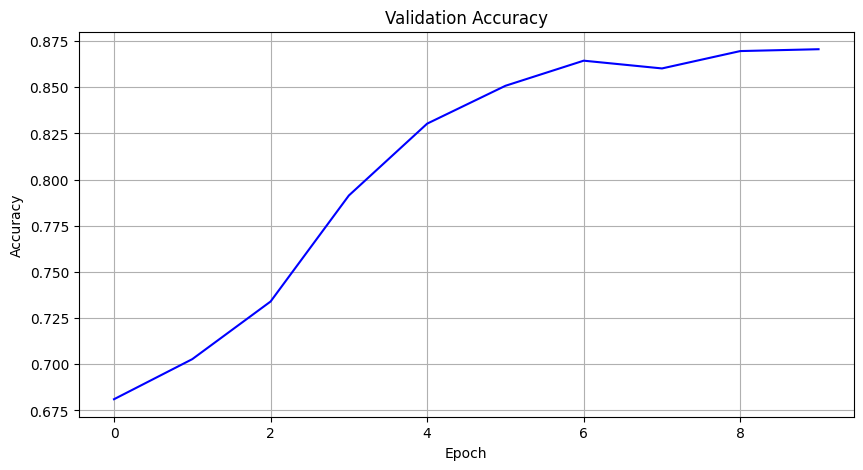

In [27]:
# Loss graph
plt.figure(figsize=(10, 5))
plt.plot(cost_list, color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

# Accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(accuracy_list, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.grid(True)
plt.show()

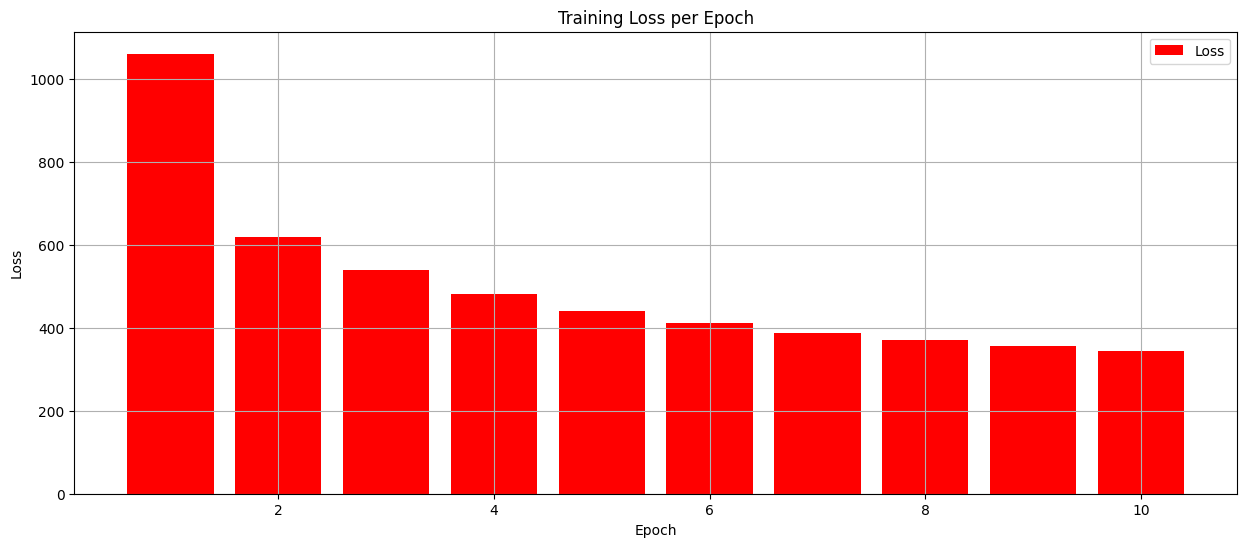

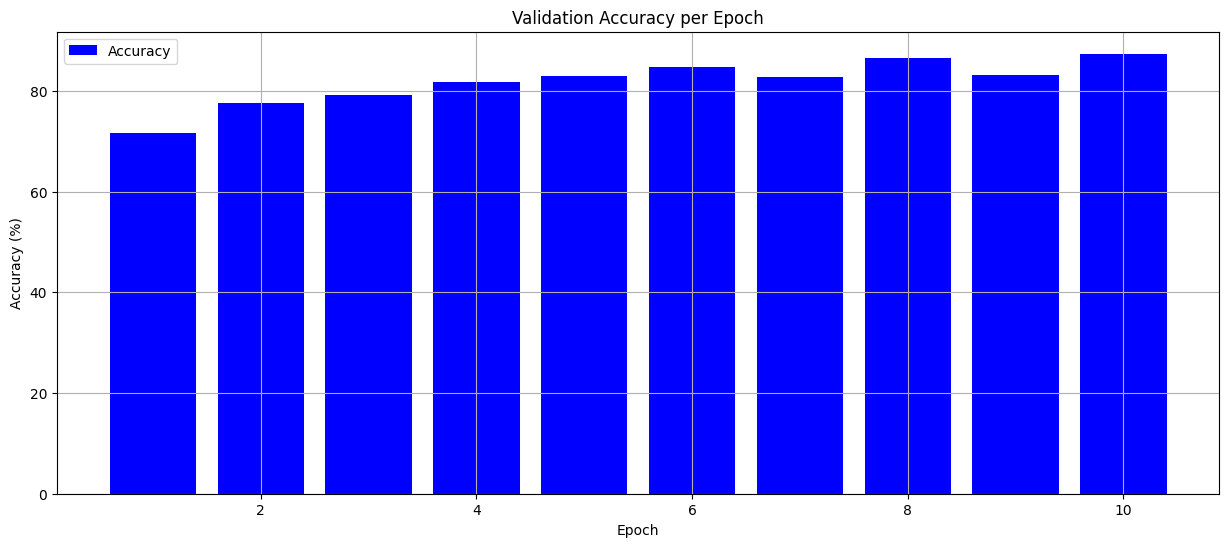

In [1]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Epoch 

# List of loss and accuracy 
loss_values = [1059.9174, 617.9556, 540.0188, 481.6918, 439.7323, 410.6366, 388.1722, 370.7794, 354.8202, 343.0907]
accuracy_values = [71.62, 77.54, 79.21, 81.67, 82.98, 84.71, 82.75, 86.44, 83.20, 87.38]

# Loss bar chart
plt.figure(figsize=(15, 6))
plt.bar(epochs, loss_values, color='red', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.grid(True)
plt.legend()
plt.show()

# Accuracy bar chart
plt.figure(figsize=(15, 6))
plt.bar(epochs, accuracy_values, color='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.grid(True)
plt.legend()
plt.show()